# **Imports**

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# **Load Files**

## Will have to git clone everytime the VM starts

In [0]:
!git clone https://github.com/abijbart/DS4H_covid19.git
dataset_dir = 'DS4H_covid19/dataset/'

# **Hospital Beds**
We have hospital bed data for:
*   Italy
*   Korea
*   Switzerland
*   USA
*   India
*   Indonesia


We will need to remove Brazil from our list of countries to model 

ALSO: let's work with 2016 hospital bed data since that is most recent for USA and the other countries have 2016 data

In [32]:
hospital_beds = pd.read_csv(dataset_dir + 'OECD_hospitalbeds.csv')
hospital_beds = hospital_beds[hospital_beds['TIME'] == 2016] 
hospital_beds = hospital_beds[['LOCATION', 'Value']] # Value is number of hospital beds PER 1000 HABITANTS
hospital_beds = hospital_beds.set_index('LOCATION')
hospital_beds

,Value
LOCATION,
Italy,3.17
Korea,11.98
Switzerland,4.55
USA,2.77
India,0.48
Indonesia,0.99


Text(0.5, 0, 'Country')

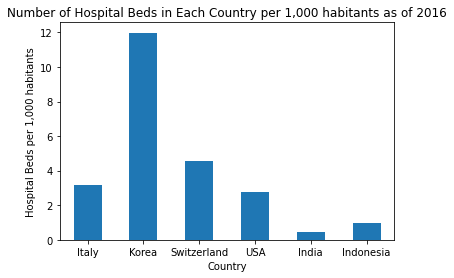

In [38]:
ax = hospital_beds.plot.bar(rot = 0, legend = False)
ax.set_title('Number of Hospital Beds in Each Country per 1,000 habitants as of 2016')
ax.set_ylabel('Hospital Beds per 1,000 habitants')
ax.set_xlabel('Country')

# **Novel Coronavirus Dataset Exploration**

In [0]:
main_df = pd.read_csv(dataset_dir + 'novel-corona-virus-2019-dataset/covid_19_data.csv')
main_df = main_df[
    (main_df['Country/Region'] == 'India') 
    | (main_df['Country/Region'] == 'South Korea') 
    | (main_df['Country/Region'] == 'Italy')
    | (main_df['Country/Region'] == 'US')
    | (main_df['Country/Region'] == 'Switzerland')
    | (main_df['Country/Region'] == 'Indonesia') ]

main_df['ObservationDate'] = pd.to_datetime(main_df['ObservationDate'])
main_df['Last Update'] = pd.to_datetime(main_df['Last Update'])

main_india = main_df[(main_df['Country/Region'] == 'India')] # 69 observation days
main_korea = main_df[(main_df['Country/Region'] == 'South Korea')] # 77 observation days
main_italy = main_df[(main_df['Country/Region'] == 'Italy')] # 68 observation days
main_switzerland = main_df[(main_df['Country/Region'] == 'Switzerland')] # 43 observation days
main_indonesia = main_df[(main_df['Country/Region'] == 'Indonesia')] # 37 observation days

## US SHOULD BE HANDLED DIFFERENTLY BECAUSE OF STATES
## WILL LIKELY COMBINE AT STATE LEVEL
## TODO
main_usa = main_df[(main_df['Country/Region'] == 'US')] # 

ObservationDate is equal to number of rows


In [52]:
print(len(main_india) if len(main_india) == len(main_india['ObservationDate'].unique()) else "UNEQUAL")
print(len(main_korea) if (len(main_korea) == len(main_korea['ObservationDate'].unique())) else "UNEQUAL")
print(len(main_italy) if (len(main_italy) == len(main_italy['ObservationDate'].unique())) else "UNEQUAL")
print(len(main_switzerland) if (len(main_switzerland) == len(main_switzerland['ObservationDate'].unique())) else "UNEQUAL")
print(len(main_indonesia) if (len(main_indonesia) == len(main_indonesia['ObservationDate'].unique())) else "UNEQUAL")

69
77
68
43
37


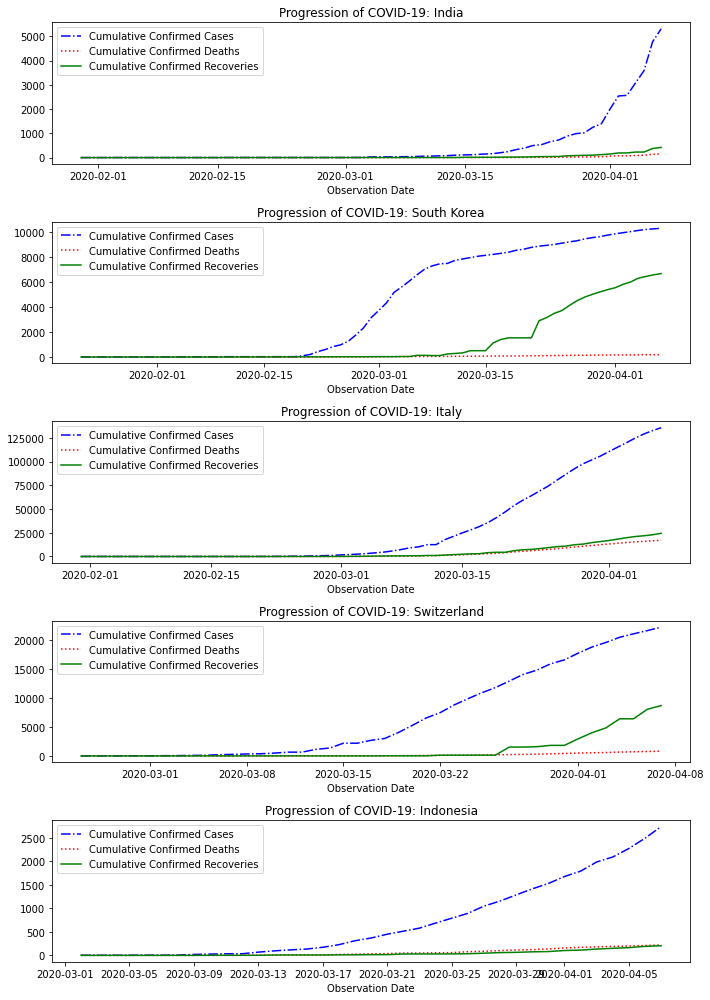

In [87]:
ROWS =5
COLS = 1
fig, axes = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(10, 14))
main_countries = [main_india, main_korea, main_italy, main_switzerland, main_indonesia]
r = 0
c = 0
count = 0

for country in main_countries:
  x = country['ObservationDate']
  y_confirmed = country['Confirmed']
  y_deaths = country['Deaths']
  y_recovered = country['Recovered']

  axes[r,].set_title('Progression of COVID-19: ' + country.iloc[0]['Country/Region'])
  axes[r,].set_xlabel('Observation Date')
  axes[r,].plot(x, y_confirmed, c= 'b', ls = '-.', label = 'Cumulative Confirmed Cases')
  axes[r,].plot(x, y_deaths, c= 'r', ls = ':', label = 'Cumulative Confirmed Deaths')
  axes[r,].plot(x, y_recovered, c= 'g', ls = '-', label = 'Cumulative Confirmed Recoveries')
  axes[r,].legend()

  count += 1
  r = count
  

fig.tight_layout()
plt.show()

In [125]:
# last day of collection was 4/7/20
deaths_vs_recovered = []
deaths_vs_confirmed = []
recovered_vs_confirmed = []
total_deaths = []
total_confirmed = []
total_recovered = []
countries = []
for country in main_countries:
  country = country.sort_values(by='ObservationDate')
  print(country.iloc[-1]['Country/Region'] + "\t" 
        + str(country.iloc[-1]['ObservationDate']))
  countries.append(country.iloc[-1]['Country/Region'])

  deaths_vs_recovered.append(country.iloc[-1]['Deaths'] 
                             / country.iloc[-1]['Recovered'])
  deaths_vs_confirmed.append(country.iloc[-1]['Deaths'] 
                             / country.iloc[-1]['Confirmed'])
  recovered_vs_confirmed.append(country.iloc[-1]['Recovered'] 
                                / country.iloc[-1]['Confirmed'])
  total_deaths.append(country.iloc[-1]['Deaths'])
  total_confirmed.append(country.iloc[-1]['Confirmed'])
  total_recovered.append(country.iloc[-1]['Recovered'])

ratios = pd.DataFrame()
ratios['Country'] = countries
ratios['Deaths to Recoverd Ratio'] = deaths_vs_recovered
ratios['Deaths to Confrimed Ratio'] = deaths_vs_confirmed
ratios['Recovered to Confirmed Ratio'] = recovered_vs_confirmed
ratios['Total Deaths'] = total_deaths

India	2020-04-07 00:00:00
South Korea	2020-04-07 00:00:00
Italy	2020-04-07 00:00:00
Switzerland	2020-04-07 00:00:00
Indonesia	2020-04-07 00:00:00


In [0]:
newIndex = ['India', 'Korea', 'Italy', 'Switzerland', 'Indonesia']
hospital_beds = hospital_beds.reindex(newIndex)
hospital_beds['Total'] = hospital_beds['Value'] * 1000
totalbeds =  hospital_beds['Total'].tolist()

totals = pd.DataFrame()
totals['Country'] = countries
totals['Confirmed'] = total_confirmed
totals['Recovered'] = total_recovered
totals['Deaths'] = total_deaths
totals['Beds'] = totalbeds

In [127]:
totals

,Country,Confirmed,Recovered,Deaths,Beds
0,India,5311.0,421.0,150.0,480.0
1,South Korea,10331.0,6694.0,192.0,11980.0
2,Italy,135586.0,24392.0,17127.0,3170.0
3,Switzerland,22253.0,8704.0,821.0,4550.0
4,Indonesia,2738.0,204.0,221.0,990.0


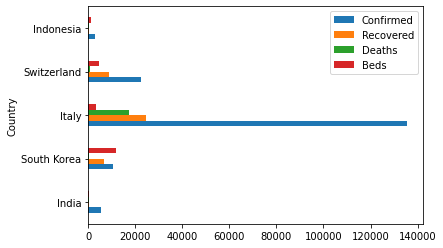

In [129]:
totals.plot.barh(x = 'Country')

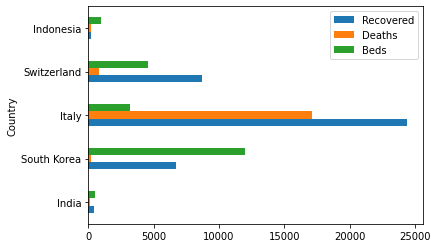

In [130]:
totals.drop(columns='Confirmed').plot.barh(x = 'Country')

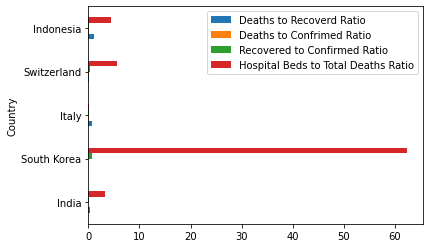

In [123]:
ratios['Total Hospital Beds'] = totalbeds
ratios['Hospital Beds to Total Deaths Ratio'] = ratios['Total Hospital Beds'] / ratios['Total Deaths']
ratios = ratios.drop(columns=['Total Deaths', 'Total Hospital Beds'])
ratios.plot.barh(x = 'Country')


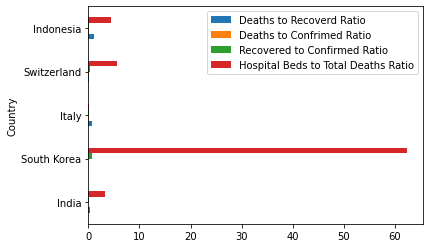

In [122]:
smaller_ratios = ratios.drop(columns=['Total Deaths', 'Total Hospital Beds'])
axes[0, 1] = smaller_ratios.plot.barh(x = 'Country')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving COVID19_open_line_list.csv to COVID19_open_line_list.csv


In [0]:
import io
covid_data = pd.read_csv(io.BytesIO(uploaded['COVID19_open_line_list.csv']))

In [0]:
covid_data['date_admission_hospital'] = pd.to_datetime(covid_data['date_admission_hospital'], errors='coerce', format='%d.%m.%Y')
covid_data['date_confirmation'] = pd.to_datetime(covid_data['date_confirmation'], errors='coerce', format='%d.%m.%Y')
covid_data['date_onset_symptoms'] = pd.to_datetime(covid_data['date_onset_symptoms'], errors='coerce', format='%d.%m.%Y')
covid_data['date_death_or_discharge'] = pd.to_datetime(covid_data['date_death_or_discharge'], errors='coerce', format='%d.%m.%Y')
covid_data.dtypes

ID                                 float64
age                                 object
sex                                 object
city                                object
province                            object
country                             object
wuhan(0)_not_wuhan(1)              float64
latitude                           float64
longitude                          float64
geo_resolution                      object
date_onset_symptoms         datetime64[ns]
date_admission_hospital     datetime64[ns]
date_confirmation           datetime64[ns]
symptoms                            object
lives_in_Wuhan                      object
travel_history_dates                object
travel_history_location             object
reported_market_exposure            object
additional_information              object
chronic_disease_binary             float64
chronic_disease                     object
source                              object
sequence_available                  object
outcome    

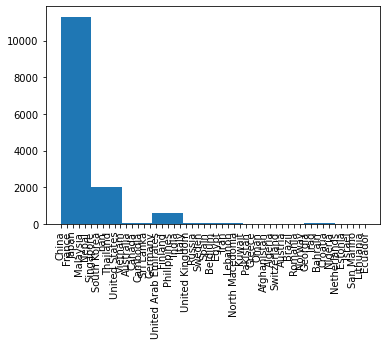

In [0]:
covid_data['country'].head(20)
plt.hist(covid_data.country.astype(str))
plt.xticks(rotation='vertical')
plt.show()


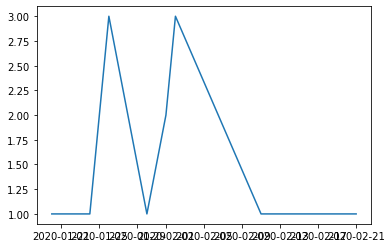

In [0]:
from matplotlib import pyplot as plt
covid_data['country'].unique()

us_admit_dates = covid_data[covid_data['country'] == 'United States']['date_admission_hospital'].unique()
us_admit_dates.sort()
admissions = []
for d in us_admit_dates:
  us = covid_data[covid_data['country'] == 'United States']
  daily_admit = len(us[us['date_admission_hospital'] == d])
  admissions.append(daily_admit)
admissions
plt.plot(us_admit_dates, admissions)
plt.show()